<a href="https://colab.research.google.com/github/Hemantr05/pyspark_notebooks/blob/master/text_classification/pyspark_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification with PySpark

source: https://www.youtube.com/watch?v=b8K_zEZBf9s

Download pyspark

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Download dataset

In [ ]:
#!wget https://raw.githubusercontent.com/Jcharis/pyspark-tutorials/main/Text_Classification_with_PySpark/data/udemy_courses_clean.csv

--2023-01-07 03:53:50--  https://raw.githubusercontent.com/Jcharis/pyspark-tutorials/main/Text_Classification_with_PySpark/data/udemy_courses_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 870036 (850K) [text/plain]
Saving to: ‘udemy_courses_clean.csv’

udemy_courses_clean 100%[===================>] 849.64K  --.-KB/s    in 0.05s   

2023-01-07 03:53:51 (16.3 MB/s) - ‘udemy_courses_clean.csv’ saved [870036/870036]



Load spark context

In [ ]:
from pyspark import SparkContext

sc = SparkContext()

ValueError: ignored

In [ ]:
# Load UI
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("text_classifier").getOrCreate()

In [ ]:
# Load dataset
df = spark.read.csv('udemy_courses_clean.csv', header=True, inferSchema=True)

In [ ]:
df.show(5)

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 hours|2017-03-09T16:34:20Z

## Data Selection

In [ ]:
# show selected columns
select_cols = df.select('course_title', 'subject')

In [ ]:
select_cols.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



In [ ]:
# Count distinct values
select_cols.groupBy('subject').count().show()

+--------------------+-----+
|             subject|count|
+--------------------+-----+
|play Electric Gui...|    1|
|Multiply returns ...|    1|
|                null|    6|
|    Business Finance| 1198|
|Introduction Guit...|    1|
|Learn Play Fernan...|    1|
|      Graphic Design|  603|
|Aprende tocar el ...|    1|
|     Web Development| 1200|
|Learn Classical G...|    1|
| Musical Instruments|  676|
+--------------------+-----+



In [ ]:
# Count distinct values via Pandas
select_cols.toPandas()['subject'].value_counts()

Web Development                                                                                                                                                                                              1200
Business Finance                                                                                                                                                                                             1198
Musical Instruments                                                                                                                                                                                           676
Graphic Design                                                                                                                                                                                                603
Multiply returns Value Investinghttpswwwudemycommultiplyyourreturnsusingvalueinvestingtrue2019421963All Levels45 hours20150723T000833Z 874284Weekly Forex Analys

In [ ]:
# Check for missing values
select_cols.toPandas()['subject'].isna().sum()

6

In [ ]:
# Drop missing values
select_cols = select_cols.dropna(subset=('subject'))

In [ ]:
select_cols.toPandas()['subject'].isna().sum()

0

In [ ]:
select_cols.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



## Feature Extraction

+ CountVectorizer
+ TFIDF
+ WordEmbedding
+ HashingTF

In [ ]:
import pyspark.ml.feature

In [ ]:
dir(pyspark.ml.feature)

['Any',
 'Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'DataFrame',
 'DenseMatrix',
 'DenseVector',
 'Dict',
 'ElementwiseProduct',
 'FeatureHasher',
 'Generic',
 'HasFeaturesCol',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasRelativeError',
 'HasSeed',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JM',
 'JavaEstimator',
 'JavaMLReadable',
 'JavaMLWritable',
 'JavaModel',
 'JavaParams',
 'JavaTransformer',
 'List',
 'MaxAbsScaler',
 'MaxAbsScalerModel',
 'MinHashLSH',
 'MinHashLSHModel',
 'MinMaxScaler',
 'MinMaxScalerModel',
 'NGram',
 'Normalizer',
 'OneHotEncoder',
 'OneHotEncoderModel',
 'Optional',
 'P',
 'PCA',
 'PCAModel',
 'Param',
 '

In [ ]:
# Load transformers
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, IDF
from pyspark.ml.feature import StringIndexer

In [ ]:
select_cols.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



In [ ]:
# Stages for pipeline
tokenizer = Tokenizer(inputCol='course_title', outputCol='course_tokens')
stopword_remover = StopWordsRemover(inputCol='course_tokens', outputCol='filtered_tokens')
counter_vectorizer = CountVectorizer(inputCol='filtered_tokens', outputCol='raw_features')
idf = IDF(inputCol='raw_features', outputCol='vectorized_features')

In [ ]:
# LabelEncoding/LabelIndexing
labelEncoder = StringIndexer(inputCol='subject', outputCol='label').fit(select_cols)

In [ ]:
labelEncoder.transform(select_cols).show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



In [ ]:
labelEncoder.labels

['Web Development',
 'Business Finance',
 'Musical Instruments',
 'Graphic Design',
 'Aprende tocar el Acorden de odo con tcnicahttpswwwudemycomaprendeatocarelacordeondeoidoycontecnicatrue25932134Beginner Level4 hours20140916T195145Z 263432Aprende los Secretos de la Armnica con HARPSOUL',
 'Introduction Guitar A Course Beginnershttpswwwudemycomintroductiontoguitartrue251631156Beginner Level25 hours20141030T155939Z 650804Guitar Master Class Learning Play Guitar Z',
 'Learn Classical Guitar Technique play Spanish Romancehttpswwwudemycomguitartechniquestrue19513164643All Levels5 hours20131118T175959Z 265888Learn Guitar Worship Learn 4 Songs unlock 1',
 'Learn Play Fernando Sors Study B minorhttpswwwudemycomstudyinbminortrue115140359Intermediate Level43 mins20140127T205816Z 398746Piano Chord Based System  Learn Play Pros Do',
 'Multiply returns Value Investinghttpswwwudemycommultiplyyourreturnsusingvalueinvestingtrue2019421963All Levels45 hours20150723T000833Z 874284Weekly Forex Analysis B

In [ ]:
label_dict = {
  'Web Development': 0,
 'Business Finance': 1,
 'Musical Instruments': 2,
 'Graphic Design': 3
}

In [ ]:
transformed_df = labelEncoder.transform(select_cols)
transformed_df.show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



## Split dataset

In [ ]:
trainSet, testSet = transformed_df.randomSplit((0.7, 0.3), seed=42)

In [ ]:
trainSet.show(10)

+--------------------+--------------------+-----+
|        course_title|             subject|label|
+--------------------+--------------------+-----+
|#1 Piano Hand Coo...| Musical Instruments|  2.0|
|#10 Hand Coordina...| Musical Instruments|  2.0|
|#4 Piano Hand Coo...| Musical Instruments|  2.0|
|#5  Piano Hand Co...| Musical Instruments|  2.0|
|#6 Piano Hand Coo...| Musical Instruments|  2.0|
|'Geometry Of Chan...|    Business Finance|  1.0|
|              000!""|Learn Classical G...|  6.0|
|1 - Concepts of S...|    Business Finance|  1.0|
|          1 Hour CSS|     Web Development|  0.0|
|1. Principles of ...|    Business Finance|  1.0|
+--------------------+--------------------+-----+
only showing top 10 rows



## Model Selection

In [ ]:
# Estimator
from pyspark.ml.classification import LogisticRegression

In [ ]:
lr = LogisticRegression(featuresCol='vectorized_features', labelCol='label')

## Build the pipeline

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
pipeline = Pipeline(stages=[tokenizer, stopword_remover, counter_vectorizer, idf, lr])

In [ ]:
pipeline.stages

Param(parent='Pipeline_3a1205232736', name='stages', doc='a list of pipeline stages')

In [ ]:
lr_model = pipeline.fit(trainSet)

## Validation

In [ ]:
predictions = lr_model.transform(testSet)

In [ ]:
predictions.show(5)

+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        course_title|            subject|label|       course_tokens|     filtered_tokens|        raw_features| vectorized_features|       rawPrediction|         probability|prediction|
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|#12 Hand Coordina...|Musical Instruments|  2.0|[#12, hand, coord...|[#12, hand, coord...|(3670,[394,491,60...|(3670,[394,491,60...|[5.54102656947194...|[0.28268355866992...|       2.0|
|#7 Piano Hand Coo...|Musical Instruments|  2.0|[#7, piano, hand,...|[#7, piano, hand,...|(3670,[9,13,60,23...|(3670,[9,13,60,23...|[-6.0823322866493...|[1.03215810564425...|       2.0|
|'Greensleeves' Cr...|Musical Instruments|  2.0|['greensleeves', ...|[

In [ ]:
predictions.select('rawPrediction', 'probability', 'subject', 'label', 'prediction').show(10)

+--------------------+--------------------+-------------------+-----+----------+
|       rawPrediction|         probability|            subject|label|prediction|
+--------------------+--------------------+-------------------+-----+----------+
|[5.54102656947194...|[0.28268355866992...|Musical Instruments|  2.0|       2.0|
|[-6.0823322866493...|[1.03215810564425...|Musical Instruments|  2.0|       2.0|
|[-1.0421312486143...|[1.23270090603942...|Musical Instruments|  2.0|       2.0|
|[-2.8211817225605...|[4.77760520281109...|   Business Finance|  1.0|       1.0|
|[21.7088196969888...|[0.99999998997280...|    Web Development|  0.0|       0.0|
|[20.0054038102897...|[0.99999996031555...|    Web Development|  0.0|       0.0|
|[18.0923732272825...|[0.99999972290786...|    Web Development|  0.0|       0.0|
|[-8.4472424738851...|[4.30624176482269...|Musical Instruments|  2.0|       2.0|
|[-24.070755029931...|[7.95180521110234...|     Graphic Design|  3.0|       3.0|
|[-6.0537484534720...|[8.425

## Model metrics

+ Accuracy
+ Precision
+ Recall
+ F1-score

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')

In [ ]:
accuracy = evaluator.evaluate(predictions)
accuracy

0.9173003802281369

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
lr_metric = MulticlassMetrics(predictions['label','prediction'].rdd)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
for label, idx in label_dict.items():
  idx = float(idx)
  print(f"Metric for {label}")
  print(f" accuracy: {lr_metric.accuracy}\n recall: {lr_metric.recall(idx)}\n precision: {lr_metric.precision(idx)}\n f1-score: {lr_metric.fMeasure(idx)}")
  print("\n\n")

Metric for Web Development
 accuracy: 0.9173003802281369
 recall: 0.9331395348837209
 precision: 0.9553571428571429
 f1-score: 0.9441176470588235



Metric for Business Finance
 accuracy: 0.9173003802281369
 recall: 0.8717948717948718
 precision: 0.9686609686609686
 f1-score: 0.9176788124156545



Metric for Musical Instruments
 accuracy: 0.9173003802281369
 recall: 0.9512195121951219
 precision: 0.8764044943820225
 f1-score: 0.912280701754386



Metric for Graphic Design
 accuracy: 0.9173003802281369
 recall: 0.961038961038961
 precision: 0.8
 f1-score: 0.873156342182891





Confusion Matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
label = predictions.select('label')
label_pd = label.toPandas()

prediction = predictions.select('prediction')
prediction_pd = prediction.toPandas()

In [ ]:
cm = confusion_matrix(label_pd, prediction_pd)

In [ ]:
display_cm = ConfusionMatrixDisplay(cm, display_labels=label_dict)

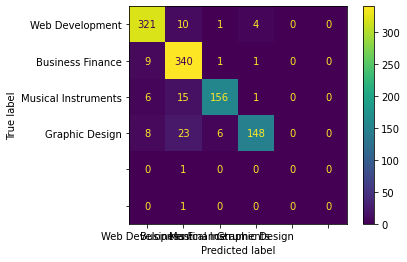

In [ ]:
display_cm.plot()

In [ ]:
import warnings
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')

In [ ]:
print(classification_report(label_pd, prediction_pd))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       336
         1.0       0.87      0.97      0.92       351
         2.0       0.95      0.88      0.91       178
         3.0       0.96      0.80      0.87       185
         5.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1

    accuracy                           0.92      1052
   macro avg       0.62      0.60      0.61      1052
weighted avg       0.92      0.92      0.92      1052



## Testing/Inferecing

In [ ]:
from pyspark.sql.types import StringType

In [ ]:
testDF = spark.createDataFrame([
    ("Bulding Machine Learning Apps with Pyspark", StringType())
    ],
                               
    # Column Name
    ["course_title"]
  )

In [ ]:
testDF.show()

+--------------------+---+
|        course_title| _2|
+--------------------+---+
|Bulding Machine L...| {}|
+--------------------+---+



In [ ]:
testDF.show(truncate=False)

+------------------------------------------+---+
|course_title                              |_2 |
+------------------------------------------+---+
|Bulding Machine Learning Apps with Pyspark|{} |
+------------------------------------------+---+



In [ ]:
test_pred = lr_model.transform(testDF)

In [ ]:
test_pred.show()

+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        course_title| _2|       course_tokens|     filtered_tokens|        raw_features| vectorized_features|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|Bulding Machine L...| {}|[bulding, machine...|[bulding, machine...|(3670,[79,115],[1...|(3670,[79,115],[4...|[6.34471761689091...|[0.34863549919778...|       1.0|
+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+



In [ ]:
test_pred.select('course_title', 'rawPrediction', 'probability', 'prediction').show()

+--------------------+--------------------+--------------------+----------+
|        course_title|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|Bulding Machine L...|[6.34471761689091...|[0.34863549919778...|       1.0|
+--------------------+--------------------+--------------------+----------+



## Show Model

In [ ]:
!rm -rf model_1

In [ ]:
model_path = 'model_1'
lr_model.save(model_path)

## Load Model

In [ ]:
from pyspark.ml.pipeline import PipelineModel

persistedModel = PipelineModel.load(model_path)

In [ ]:
persistedModel

PipelineModel_af887054d85e

In [ ]:
dir(persistedModel)

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_copyValues',
 '_copy_params',
 '_defaultParamMap',
 '_dummy',
 '_from_java',
 '_is_protocol',
 '_paramMap',
 '_params',
 '_randomUID',
 '_resetUid',
 '_resolveParam',
 '_set',
 '_setDefault',
 '_shouldOwn',
 '_testOwnParam',
 '_to_java',
 '_transform',
 'clear',
 'copy',
 'explainParam',
 'explainParams',
 'extractParamMap',
 'getOrDefault',
 'getParam',
 'hasDefault',
 'hasParam',
 'isDefined',
 'isSet',
 'load',
 'params',
 'read',
 'save',
 'set',
 'stages',
 'transform',
 'uid',
 'write']

In [ ]:
pred = persistedModel.transform(testDF)

In [ ]:
pred.show()

+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        course_title| _2|       course_tokens|     filtered_tokens|        raw_features| vectorized_features|       rawPrediction|         probability|prediction|
+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|Bulding Machine L...| {}|[bulding, machine...|[bulding, machine...|(3670,[79,115],[1...|(3670,[79,115],[4...|[6.34471761689091...|[0.34863549919778...|       1.0|
+--------------------+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+



In [ ]:
pred.select('course_title', 'probability', 'prediction').show()

+--------------------+--------------------+----------+
|        course_title|         probability|prediction|
+--------------------+--------------------+----------+
|Bulding Machine L...|[0.34863549919778...|       1.0|
+--------------------+--------------------+----------+

